# The Multi-Armed Bandits: Exploitation vs Exploration  

Objetivo: gym GuessingGame-v0

$R_{t}$ - Reward received at time t  
$A_{t}$ - Action at time t  
$k$ - Number of possible actions  
$q(a)$ - Expected reward given that action a is chosen: $q(a)\equiv \mathbb{E}[R_{t}|A_{t}=a]$  
$Q_{t}(a)$ - Estimated value of action aat time t.

## 10-armed Testbed

Descrição do problema: .....

Estratégias: Near-Greedy, Optimistic, Upper-Confidence-bound Action Selection, Gradient Bandit Algorithms



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

$R_{t}$ - Reward received at time t  
$A_{t}$ - Action at time t  
$k$ - Number of possible actions  
$q(a)$ - Expected reward given that action a is chosen: $q(a)\equiv \mathbb{E}[R_{t}|A_{t}=a]$  
$Q_{t}(a)$ - Estimated value of action aat time t.

Text(0.5, 0, 'Action')

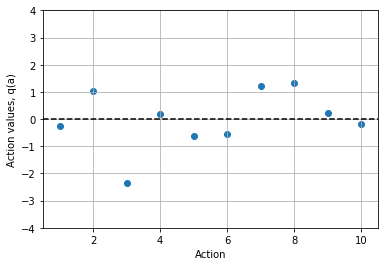

In [3]:
q = np.random.normal(0,1,(1,10))
plt.grid(True)
plt.scatter(np.arange(1,11),q[0,:])
plt.ylim(-4,4)
plt.xlim(0.5,10.5)
plt.plot([0.5,10.5],[0.,0],'--k')
plt.ylabel('Action values, q(a)')
plt.xlabel('Action')

In [4]:
def nearGreedy_plot(eps):
    K = 2000
    M = 1000
    q = np.random.normal(0,1,(K,10))
    Q = np.random.normal(0,1,(K,10))*0.00001
    #Q[:,:]=5     # uncomment to change initial value
    A = np.zeros([K,10])
    R = np.zeros([K,10])

    ER = np.zeros([1,K])
    RT = np.zeros([1,K])
    RTm = np.zeros([1,K])
    ERm = np.zeros([1,K])
    PAm = np.zeros([M])
    for j in range(M):
        PA = np.zeros([K])
        for i in range(K):
            if np.random.rand() < eps:
                a = np.random.randint(0,10)
            else:
                a = np.argmax(Q[i,:])
            A[i,a] = A[i,a] +1
            R[i,a] = np.random.normal(q[i,a],1)
            Q[i,a] = Q[i,a]+(1./A[i,a])*(R[i,a]-Q[i,a])
            ER[0,i] = abs(Q[i,a]-q[i,a])
            RT[0,i] = Q[i,a]
            if a == np.argmax(q[i,:]):
                PA[i] += 1

        PAm[j] = np.sum(PA)/len(PA)
        RTm = np.vstack([RTm,RT])
        ERm = np.vstack([ERm,ER])


    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.plot(range(len(RTm)),np.mean(RTm,axis=1))
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.subplot(1,2,2)
    plt.plot(range(len(ERm)),np.mean(ERm,axis=1))
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Abs(Q-q)')
    plt.show()
    plt.figure(figsize=(16,5))
    plt.plot(range(len(PAm)),PAm*100)
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Average % right choice')
    plt.ylim(0,100)
    plt.show()

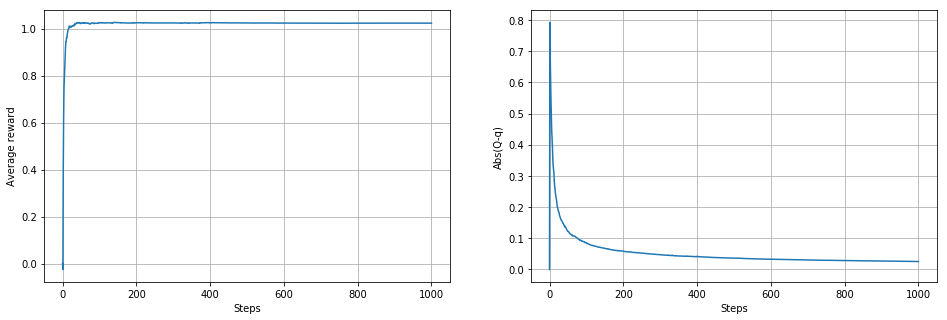

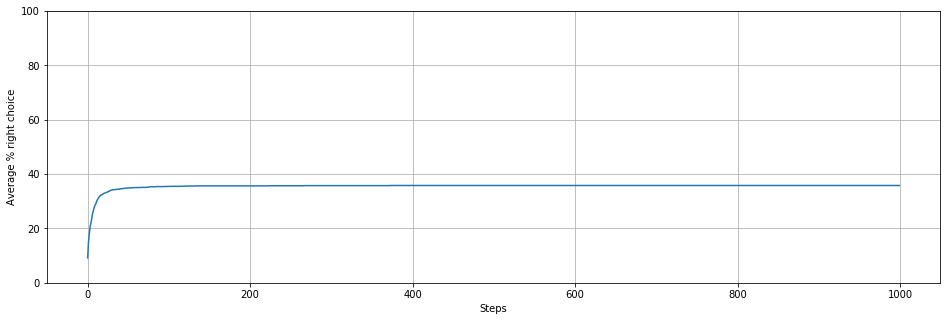

In [5]:
nearGreedy_plot(0.0)

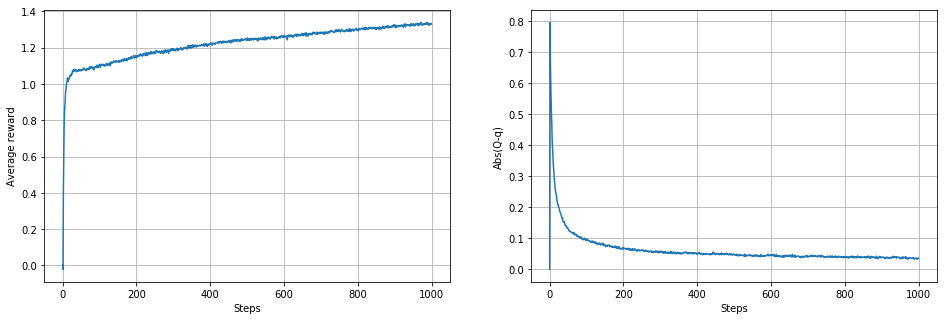

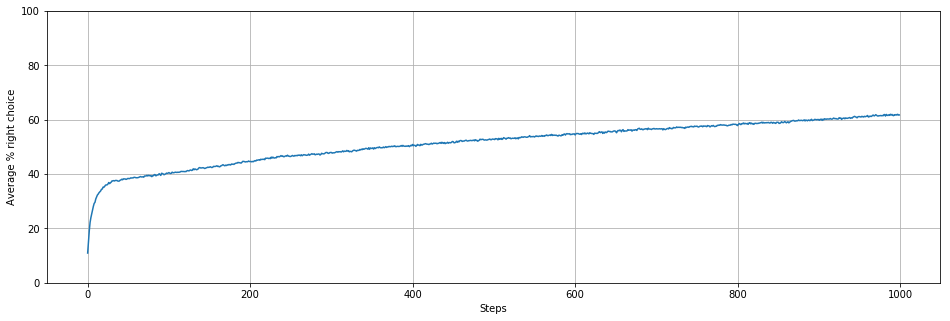

In [6]:
nearGreedy_plot(0.01)

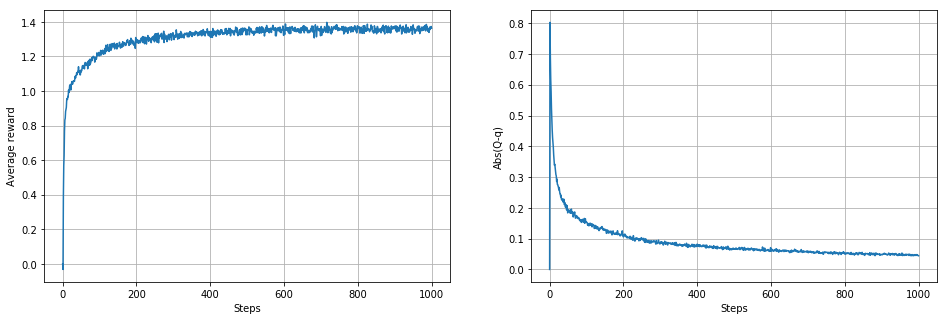

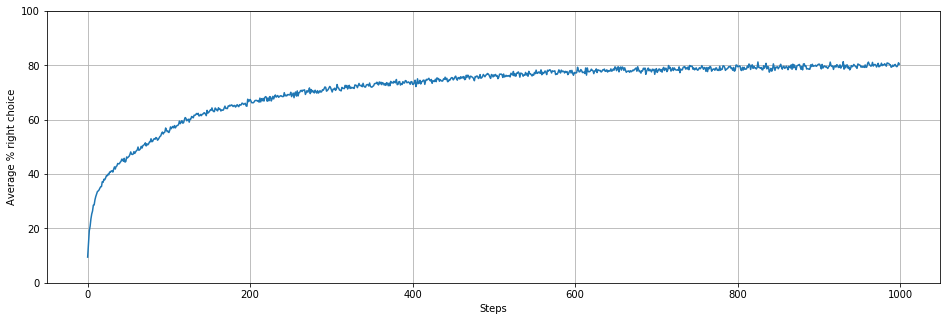

In [7]:
nearGreedy_plot(0.1)

---

In [8]:
def nearGreedy(eps):
    K = 2000
    M = 1000
    q = np.random.normal(0,1,(K,10))
    Q = np.random.normal(0,1,(K,10))*0.00001
    A = np.zeros([K,10])
    R = np.zeros([K,10])

    ER = np.zeros([1,K])
    RT = np.zeros([1,K])
    RTm = np.zeros([1,K])
    ERm = np.zeros([1,K])
    PAm = np.zeros([M])
    for j in range(M):
        PA = np.zeros([K])
        for i in range(K):
            if np.random.rand() < eps:
                a = np.random.randint(0,10)
            else:
                a = np.argmax(Q[i,:])
            A[i,a] = A[i,a] +1
            R[i,a] = np.random.normal(q[i,a],1)
            Q[i,a] = Q[i,a]+(1./A[i,a])*(R[i,a]-Q[i,a])
            ER[0,i] = abs(Q[i,a]-q[i,a])
            RT[0,i] = Q[i,a]
            if a == np.argmax(q[i,:]):
                PA[i] += 1

        PAm[j] = np.sum(PA)/len(PA)
        RTm = np.vstack([RTm,RT])
        ERm = np.vstack([ERm,ER])

    return RTm,ERm,PAm

In [9]:
def plotRT(A1,A2,A3,eps1,eps2,eps3):
    plt.figure(figsize=(16,5))
    plt.plot(range(len(A1)),np.mean(A1,axis=1),label = '$\epsilon$ = '+ str(eps1))
    plt.plot(range(len(A2)),np.mean(A2,axis=1),label = '$\epsilon$ = '+ str(eps2))
    plt.plot(range(len(A3)),np.mean(A3,axis=1),label = '$\epsilon$ = '+ str(eps3))
    plt.legend(loc=0)
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Average reward (epsilon)')
    plt.ylim(0,1.55)


In [10]:
def plotER(A1,A2,A3,eps1,eps2,eps3):
    plt.figure(figsize=(16,5))
    plt.plot(range(len(A1)),np.mean(A1,axis=1),label = '$\epsilon$ = '+ str(eps1))
    plt.plot(range(len(A2)),np.mean(A2,axis=1),label = '$\epsilon$ = '+ str(eps2))
    plt.plot(range(len(A3)),np.mean(A3,axis=1),label = '$\epsilon$ = '+ str(eps3))
    plt.legend(loc=0)
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Abs(Q-q) (epsilon)')
    plt.show()


In [11]:
def plotPA(A1,A2,A3,eps1,eps2,eps3):
    plt.figure(figsize=(16,5))
    plt.plot(range(len(A1)),A1*100,label = '$\epsilon$ = '+ str(eps1))
    plt.plot(range(len(A2)),A2*100,label = '$\epsilon$ = '+ str(eps2))
    plt.plot(range(len(A3)),A3*100,label = '$\epsilon$ = '+ str(eps3))
    plt.legend(loc=0)
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Average % right choice ($\epsilon$)')
    plt.ylim(0,100)


In [12]:
A1,B1,C1 = nearGreedy(0.0)

In [13]:
A2,B2,C2 = nearGreedy(0.01)

In [14]:
A3,B3,C3 = nearGreedy(0.1)

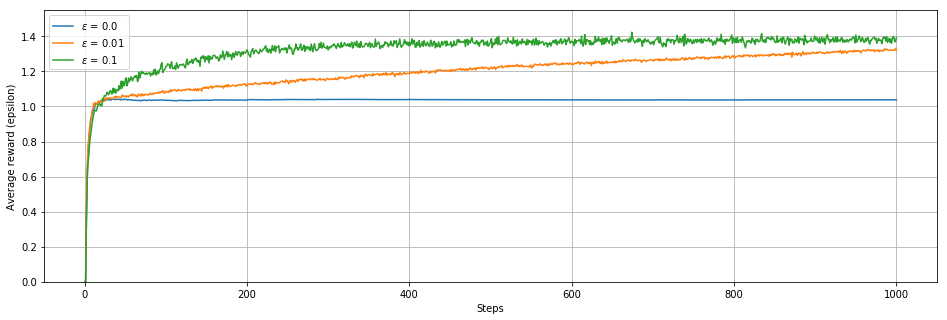

In [15]:
plotRT(A1,A2,A3,0.0,0.01,0.1)

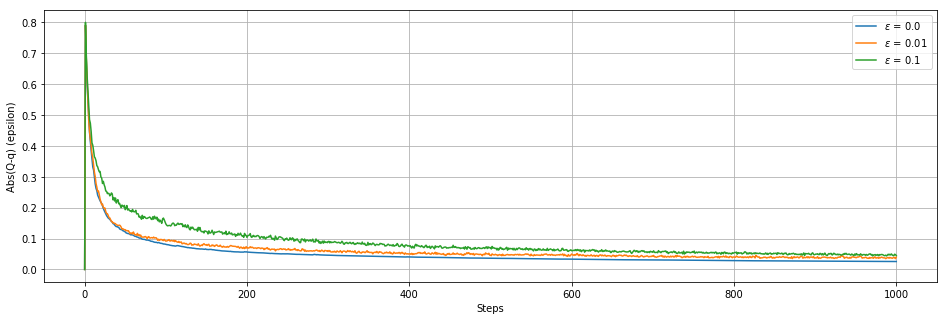

In [16]:
plotER(B1,B2,B3,0.0,0.01,0.1)

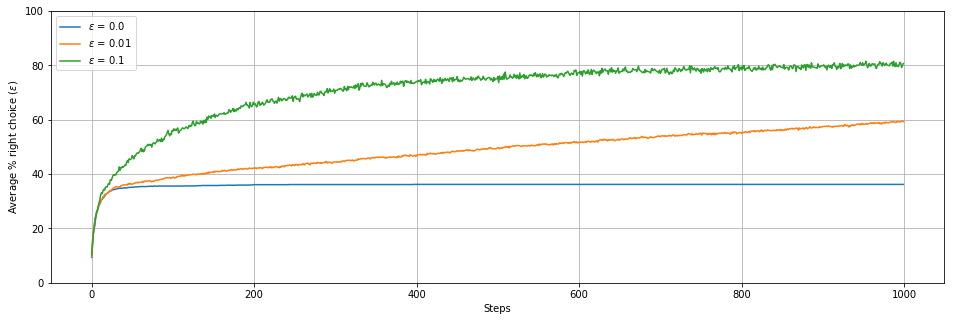

In [17]:
plotPA(C1,C2,C3,0.0,0.01,0.1)